In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [11]:
from PIL import Image
import matplotlib.pyplot as plt
import os
from cropping_functions import *
import numpy as np

In [12]:
from PIL.ImageOps import flip, mirror
import PIL

In [13]:
folder_to_scan = '/Users/ivanlengyel/datasets/mars_all_curated/'

In [14]:
files = os.listdir(folder_to_scan)

In [15]:
len(files)

343

In [16]:
valid_file_types = ['.jpg']
valid_files = []
for file in files:
    f, fe = os.path.splitext(file)
    if fe in valid_file_types:
        valid_files.append(file)

full_path_valid_files = [folder_to_scan+file for file in valid_files]


In [17]:
cropping_window = 512
saving_folder_name = './cropped_files/'
padding_tresh = 0.25

resize = False
image_output_size = 512

In [18]:
def image_square_resize(im_input, new_size):
    im = im_input.copy()
    im = im.resize((new_size, new_size), PIL.Image.ANTIALIAS)    
    
    return im

In [19]:
def image_shifter(im_input, left_shift, bottom_shift):
        shift_box = (left_shift, bottom_shift ,im_input.size[0], im_input.size[1])
        return im_input.crop(shift_box)

In [40]:
def image_rotater(im_input, angle):
    if angle==90:
        return im_input.transpose(Image.ROTATE_90) 
    elif angle == 180:
        return im_input.transpose(Image.ROTATE_180) 
    elif angle == 270:
        return im_input.transpose(Image.ROTATE_270) 
    elif angle == 0:
        return im_input
    else:
        raise ValueError('No agle supported')

In [28]:
def image_augmentator(im_input, return_orig = True):
    im_aug = []
    if return_orig:
        im_aug.append(im_input.copy())
    # 1.FLIP
    im_aug.append(flip(im_input.copy()))
    # 2. rot 180
    im_aug.append(image_rotater(im_input.copy(), 180))
    # 3. Flip(rot_90)
    im_aug.append(flip(image_rotater(im_input.copy(), 90)))
    # 4. (flip(rot_270))
    im_aug.append(flip(image_rotater(im_input.copy(), 270)))
    return im_aug

In [45]:
def random_augmentator(im_input, return_orig = True):
    im_aug = []
    transfm = []
    if return_orig:
        im_aug.append(im_input.copy())
        transfm.append('None')
    # 1.FLIP
    for i in range(4):
        augmented = im_input.copy()
        t = ''
        if np.random.choice([True, False]):
            augmented = flip(augmented)
            t += '_flip'
        if np.random.choice([True, False]):
            augmented = mirror(augmented)
            t += '_mirror'
        angle = np.random.choice([90, 180, 270])
        augmented = image_rotater(augmented, angle)
        t += '_{}'.format(angle)
        im_aug.append(augmented)
        transfm.append(t)
    return im_aug, transfm
#     im_aug.append(flip(im_input.copy()))
#     # 2. rot 180
#     im_aug.append(image_rotater(im_input.copy(), 180))
#     # 3. Flip(rot_90)
#     im_aug.append(flip(image_rotater(im_input.copy(), 90)))
#     # 4. (flip(rot_270))
#     im_aug.append(flip(image_rotater(im_input.copy(), 270)))
#     return im_aug

In [35]:
np.random.choice([True, False])

False

### No augmentation

In [ ]:
for file in full_path_valid_files[:2]:
#for file in full_path_valid_files:    
    # load file
    im = Image.open(file)
    # generate cropping boxes for file
    croping_boxes = generate_cropping_boxes(im, cropping_window, padding_tresh) 
    file_name = os.path.basename(file)
    base_name, file_ext = os.path.splitext(file_name)
    for i,b in enumerate(croping_boxes):
        imc = im.crop(b) #left bottom right upper
        if resize: 
            imc = image_square_resize(imc,image_output_size )
        f_name = saving_folder_name + base_name +'_{}_'.format(i) + file_ext
        imc.save(f_name)
    
    
    

### Aumentation

In [14]:
#for file in full_path_valid_files[:1]:
for file in full_path_valid_files[::-1]:    
    # load file
    im = Image.open(file)
    for ia, im in enumerate(image_augmentator(im)):
        # generate cropping boxes for file
        croping_boxes = generate_cropping_boxes(im, cropping_window, padding_tresh) 

        file_name = os.path.basename(file)
        base_name, file_ext = os.path.splitext(file_name)
        for i,b in enumerate(croping_boxes):
            imc = im.crop(b) #left bottom right upper
            if resize: 
                imc = image_square_resize(imc,image_output_size )
            f_name = saving_folder_name + base_name +'_{}_{}_'.format(ia,i) + file_ext
            imc.save(f_name)
    
    
    

# Test image

In [29]:
im = Image.open('./test_image-1-01.png')

### Augmentator

<IPython.core.display.Javascript object>


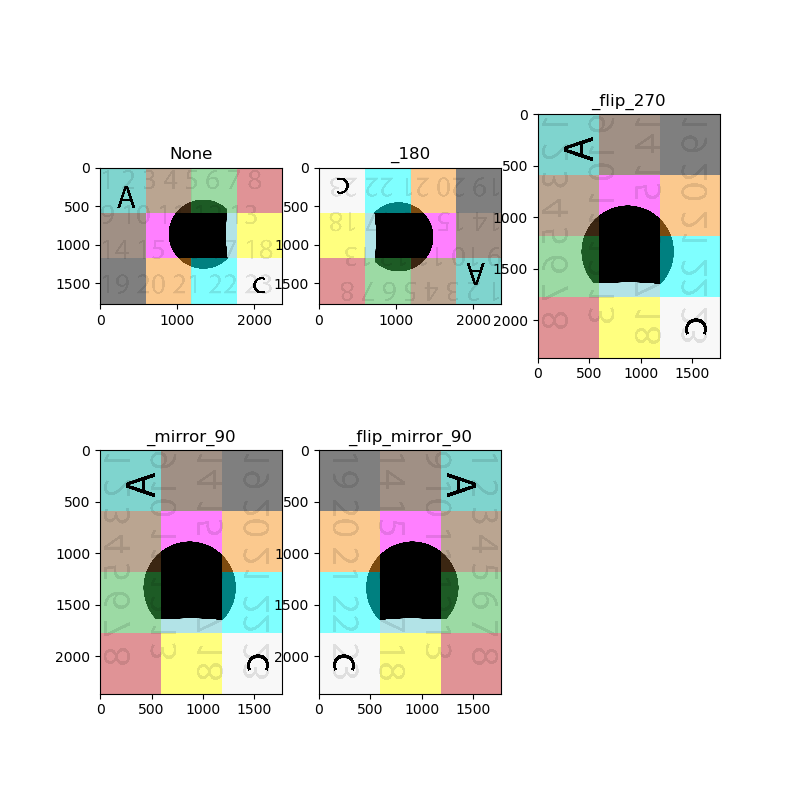

In [47]:
augs, transfs = random_augmentator(im)
plt.figure(figsize=(8,8))
imagess = augs
for i,imm in enumerate(imagess):
    ax = plt.subplot(2,3,i+1)
    plt.imshow(imm)
    ax.set_title(transfs[i])

<IPython.core.display.Javascript object>


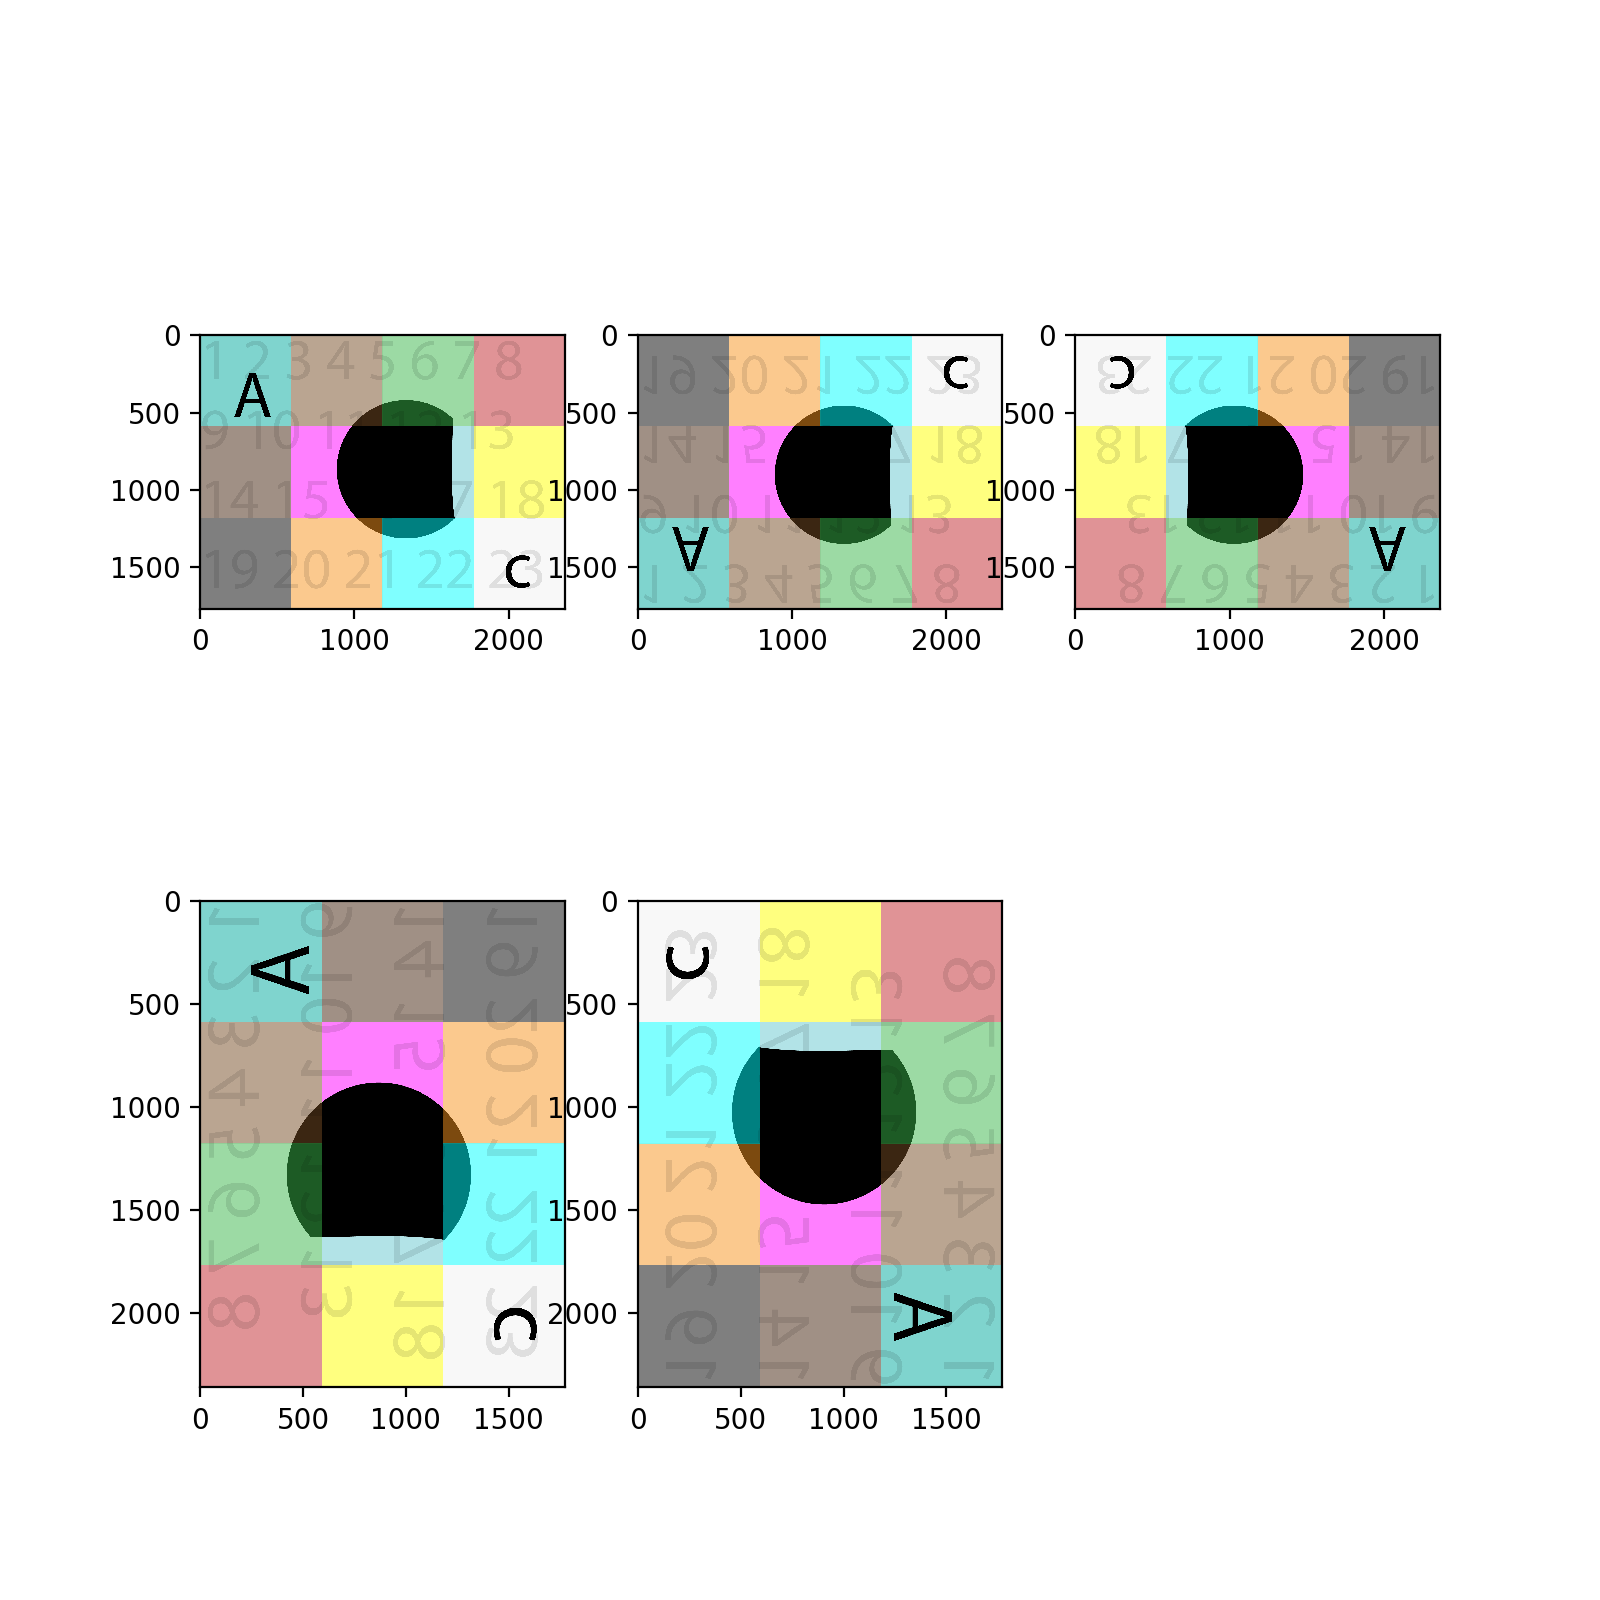

In [37]:
augs = image_augmentator(im)
plt.figure(figsize=(8,8))
imagess = augs
for i,imm in enumerate(imagess):
    plt.subplot(2,3,i+1)
    plt.imshow(imm)

### Mirror image

<IPython.core.display.Javascript object>


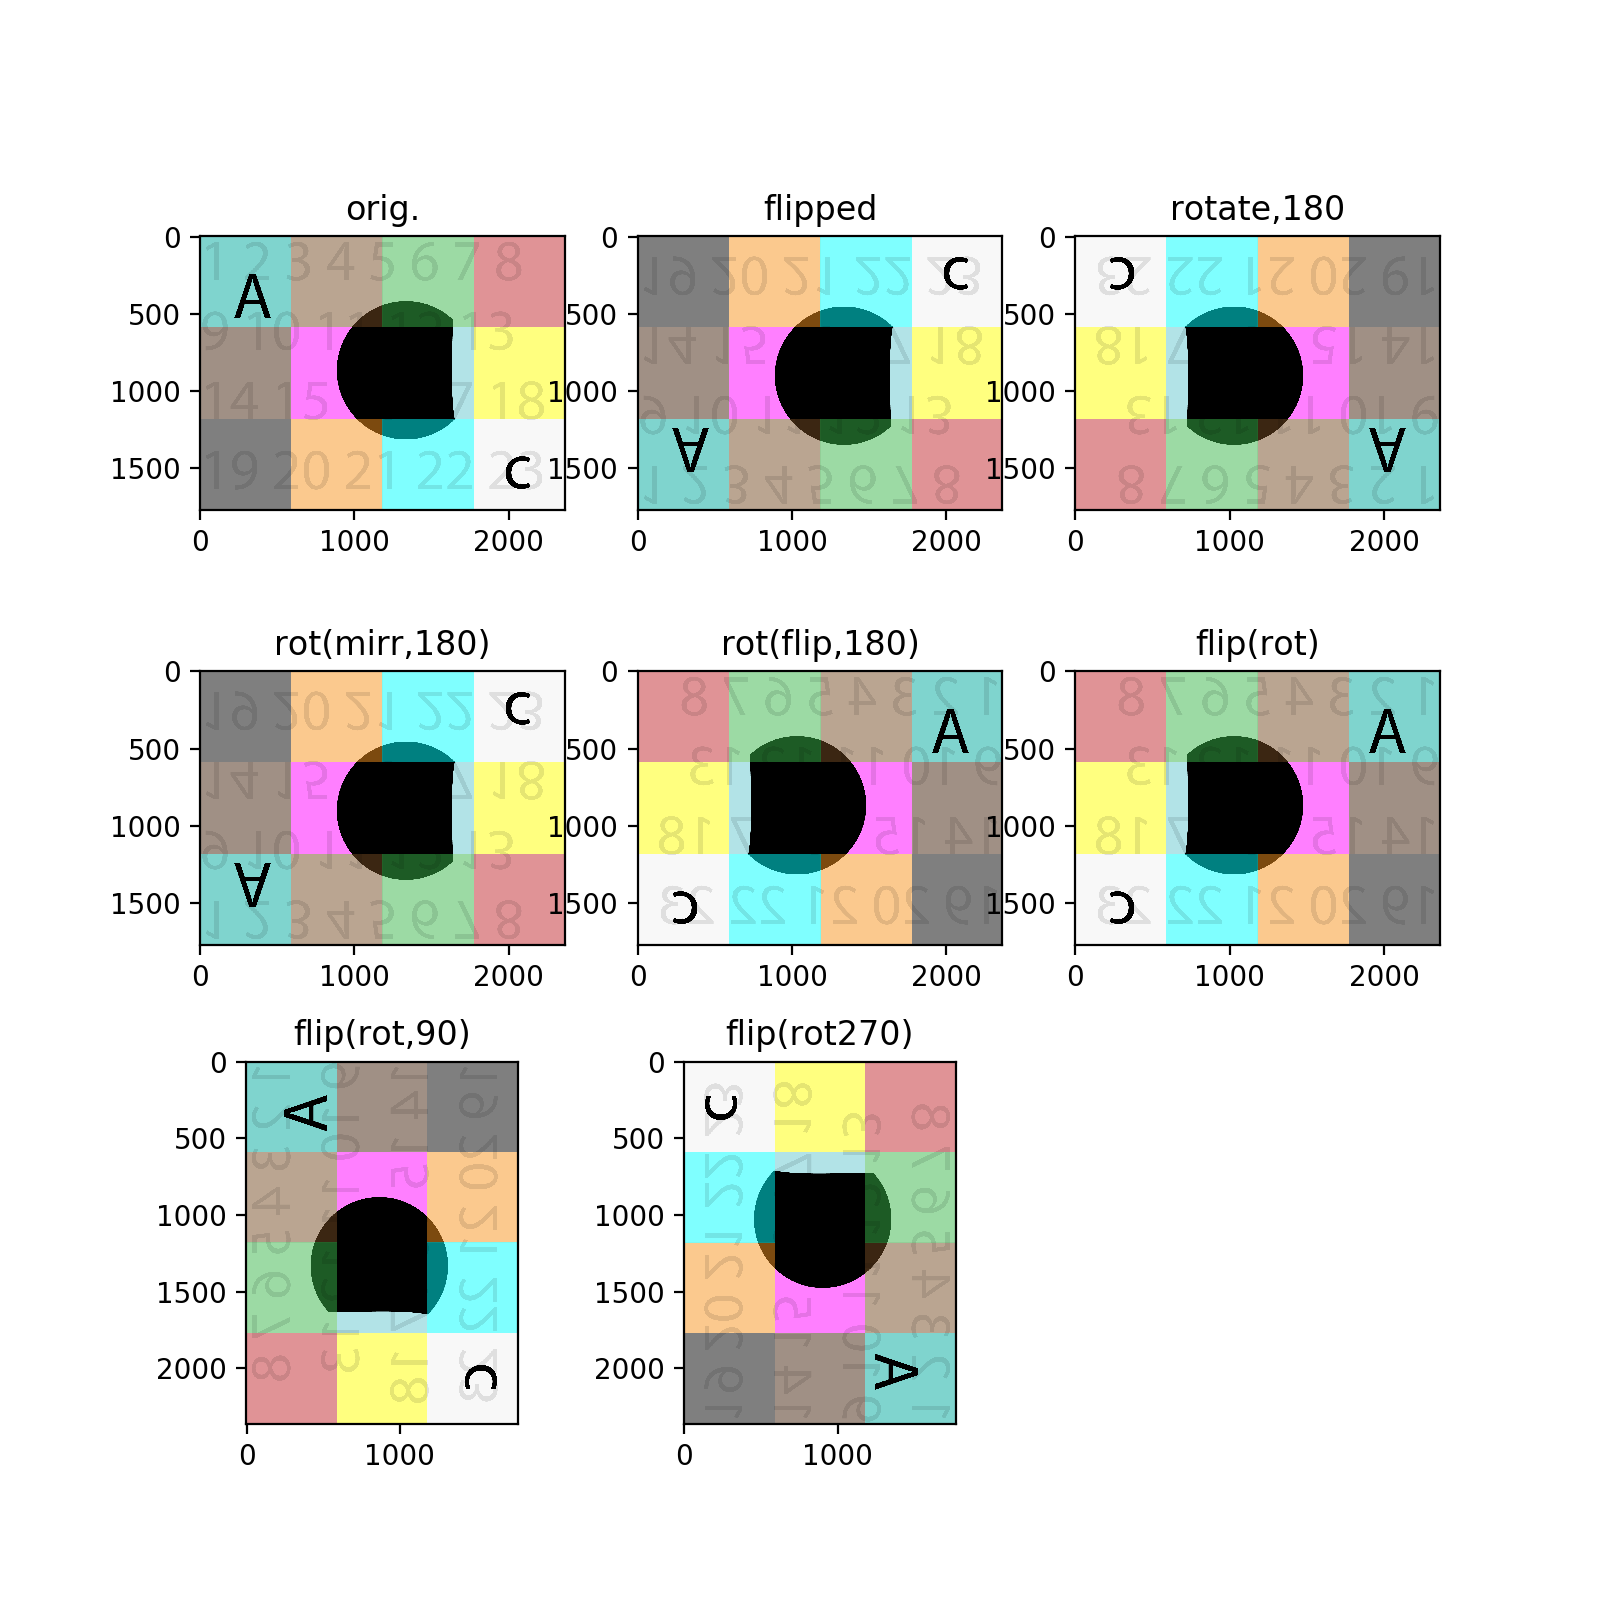

Text(0.5, 1.0, 'flip(rot270)')

In [25]:
plt.figure(figsize=(8,8))
#
plt.subplot(3,3,1)
plt.title('orig.')
plt.imshow(im)
#
plt.subplot(3,3,2)
plt.title('flipped')
temp_flip = flip(im)
plt.imshow(temp_flip)
#
plt.subplot(3,3,3)
plt.imshow((image_rotater(im, 180)))
plt.title('rotate,180')
#
plt.subplot(3,3,4)
plt.imshow(image_rotater(mirror(im), 180))
plt.title('rot(mirr,180)')
#
plt.subplot(3,3,5)
plt.imshow(image_rotater(temp_flip, 180))
plt.title('rot(flip,180)')
#
plt.subplot(3,3,6)
plt.imshow(flip(image_rotater(im, 180)))
plt.title('flip(rot)')
#
plt.subplot(3,3,7)
plt.imshow(flip(image_rotater(im, 90)))
plt.title('flip(rot,90)')
#
plt.subplot(3,3,8)
plt.imshow(flip(image_rotater(im, 270)))
plt.title('flip(rot270)')

### Shift

In [26]:
im.size

(2363, 1772)

In [27]:
croping_boxes

NameError: name 'croping_boxes' is not defined

In [ ]:
#shift_box = (256, 256 ,im.size[0], im.size[1])
#ims = im.crop(shift_box)
ims = image_shifter(im, 1000, 256)

In [ ]:
plt.figure()
plt.imshow(im)
plt.figure()
plt.imshow(ims)

### Rotate

In [ ]:
plt.figure()
plt.imshow(im)

In [ ]:
imr = im.transpose(Image.ROTATE_180) 
plt.figure()
plt.imshow(imr)

### Shift the size